In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [124]:
# Importing the dataset
dataset = pd.read_csv('Desktop/Datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # First column is not taken since it is just verbal representation of the second column, second column is taken instead
y = dataset.iloc[:, -1].values
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [125]:
# Filling the empty values with mean 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [126]:
# Feature Scaling
y = y.reshape(len(y),1) # making y a 2D array 
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [127]:
# Training the model on the whole dataset
regressor = SVR(kernel = 'rbf') # The Radial Basis Function is used
regressor.fit(X, y.ravel())

SVR()

In [135]:
# Prediction of the new result
predicted_value = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
print(predicted_values)

[[170370.0204065]]


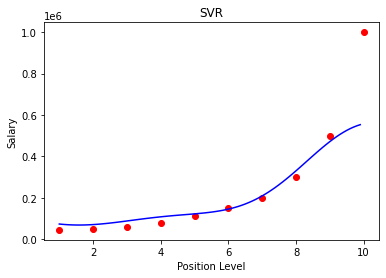

In [136]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red') # X axis, Y axis, color
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()